In [1]:
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec
from scipy.stats import norm
import scipy as sp
from scipy.integrate import odeint,quad,simps,trapz
from scipy.special import eval_hermite,eval_hermitenorm
from math import sqrt,sin,pi,cos,exp,log,factorial
from IPython.core.display import display, HTML
import sys
sys.path.append(r'/mnt/c/Users/Alejandro Lopez/Imperial College London/MSc Project - Alejandro López - MA - General/repository')
figures_route = r'/mnt/c/Users/Alejandro Lopez/Imperial College London/MSc Project - Alejandro López - MA - General/MSc Project - Latex/Figures/'
from nonparametric_generator import *
import matplotlib
def pgf_switch(setting = 'off'):
    if setting == 'off':
        matplotlib.use('module://ipykernel.pylab.backend_inline')
        matplotlib.rcParams.update({
            "pgf.texsystem": "xelatex",
            'font.family': ['sans-serif'],
            'text.usetex': False,
            'pgf.rcfonts': True,
        })
    else:
        matplotlib.use("pgf")
        matplotlib.rcParams.update({
            "pgf.texsystem": "pdflatex",
            'font.family': 'serif',
            'text.usetex': True,
            'pgf.rcfonts': False,
        })

display(HTML("<style>.container { width:95% !important; }</style>"))

$$ dX_t =[ X_t - X_t^3 + A \cos(\epsilon t) ]dt + \sqrt{2D}dW_t$$
$$U(x,t) = -\frac{1}{2}x^2 + \frac{1}{4}x^4 - Ax\cos(\epsilon t)$$
$$U'(x,t) = - x + x^3 - A \cos(\epsilon t)  $$

In [80]:
def U(x,t,A,epsilon):
    return((-1/2)*x**2 + (1/4)*x**4 - A*np.cos(epsilon * t))
def dU(x,t,A,epsilon):
    return(-x + x**3 - A*np.cos(epsilon*t))
def SRsimulation0(x0, n,dt,epsilon=0.01,A=1,D=1):
    """
    Function to create the trayectory of a OU process
    with difussion paramter D 

    :param x0: Intial position
    :param n:  Number of steps
    "param dt: Step size
    :param D:  Difussion parameter

    :return X: Trajectory
    """
    t = np.linspace(x0,dt*n,n)
    X = np.zeros((n,1))
    noise = np.random.normal(loc=0,scale=np.sqrt(dt),size=(n,1))
    for i in range(1,n):
        x = X[i-1,:]
        X[i,:] = x -dU(x,t[i],A,epsilon)*dt +np.sqrt(2*D)* noise[i]
    return(X)

In [83]:
x0 = 0
n = int(5e5)
dt = 1e-2
epsilon = 0.003
D = 0.04
A = 0.1
X = SRsimulation0(x0,n,dt,epsilon,A,D)

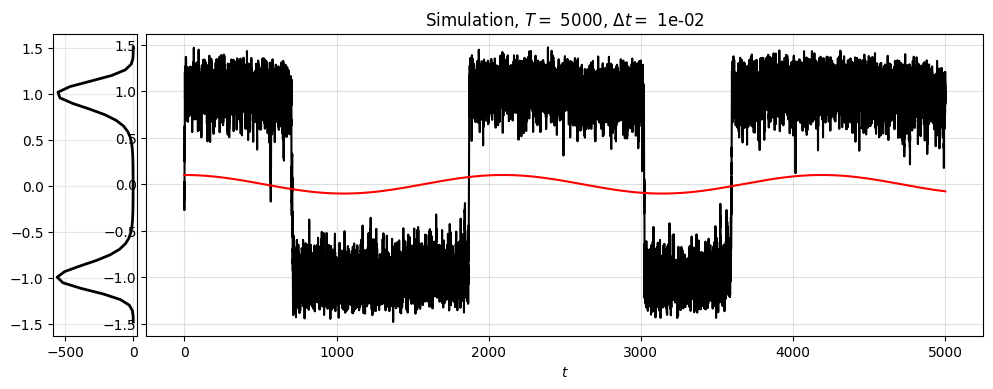

In [87]:
gs1 = GridSpec(1, 2, width_ratios=[1,10],wspace=0.02,hspace=0.3)
fig = plt.figure(figsize=(12,4),dpi=100)

p_eq = density_estimation(X[:,0])
ax1 = fig.add_subplot(gs1[0,0])
# _ = ax1.plot([-p_eq([x]) for x in np.linspace(min(X[:,0]),max(X[:,0]))],np.linspace(min(X[:,0]),max(X[:,0])),color='k',lw=2)

_ = ax1.plot([-np.exp(-U(x,1,epsilon,A)/D) for x in np.linspace(min(X[:,0]),max(X[:,0]))],np.linspace(min(X[:,0]),max(X[:,0])),color='k',lw=2)
_ = ax1.grid(alpha=0.3)

ax2 = fig.add_subplot(gs1[0,1])
_ = ax2.plot(np.linspace(x0,n*dt,int(n/4)), X[::4,0],color='black')
_ = ax2.plot(np.linspace(x0,n*dt,200), A*np.cos(epsilon * np.linspace(x0,n*dt,200)),color='r')
_ = ax2.grid(alpha=0.4)
_ = ax2.set_xlabel("$t$")
_ = ax2.set_title(f"Simulation, $T=$ {n*dt:.0f}, $\Delta t =$ {dt:.0e}")

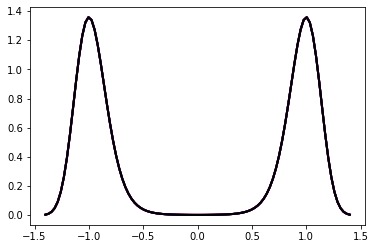

In [142]:
for t in np.linspace(0,2*pi/epsilon,10):
    Z = trapz(x = np.linspace(-3,3,100),y = [np.exp(-U(x,t,epsilon,A)/D) for x in np.linspace(-3,3,100)])
    plt.plot(np.linspace(-1.4,1.4,100),[(1/Z) * np.exp(-U(x,t,epsilon,A)/D) for x in np.linspace(-1.4,1.4,100)],lw=2,color=plt.cm.magma_r(t/(2*pi/epsilon)))
